[*********************100%%**********************]  1 of 1 completed


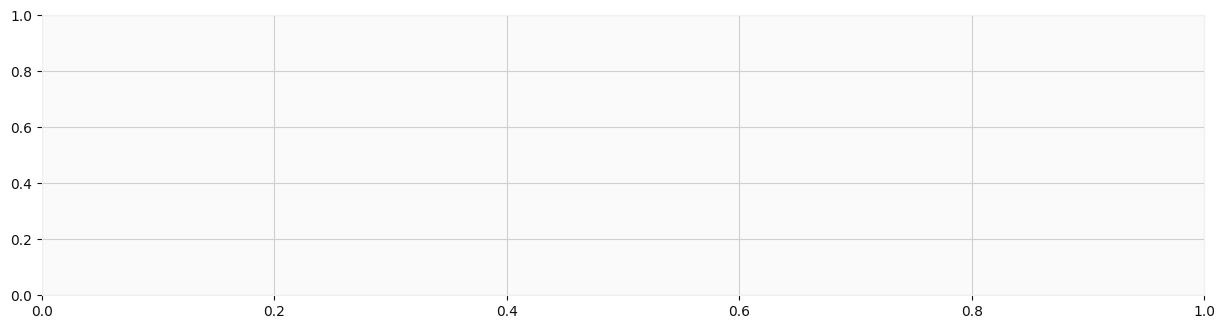

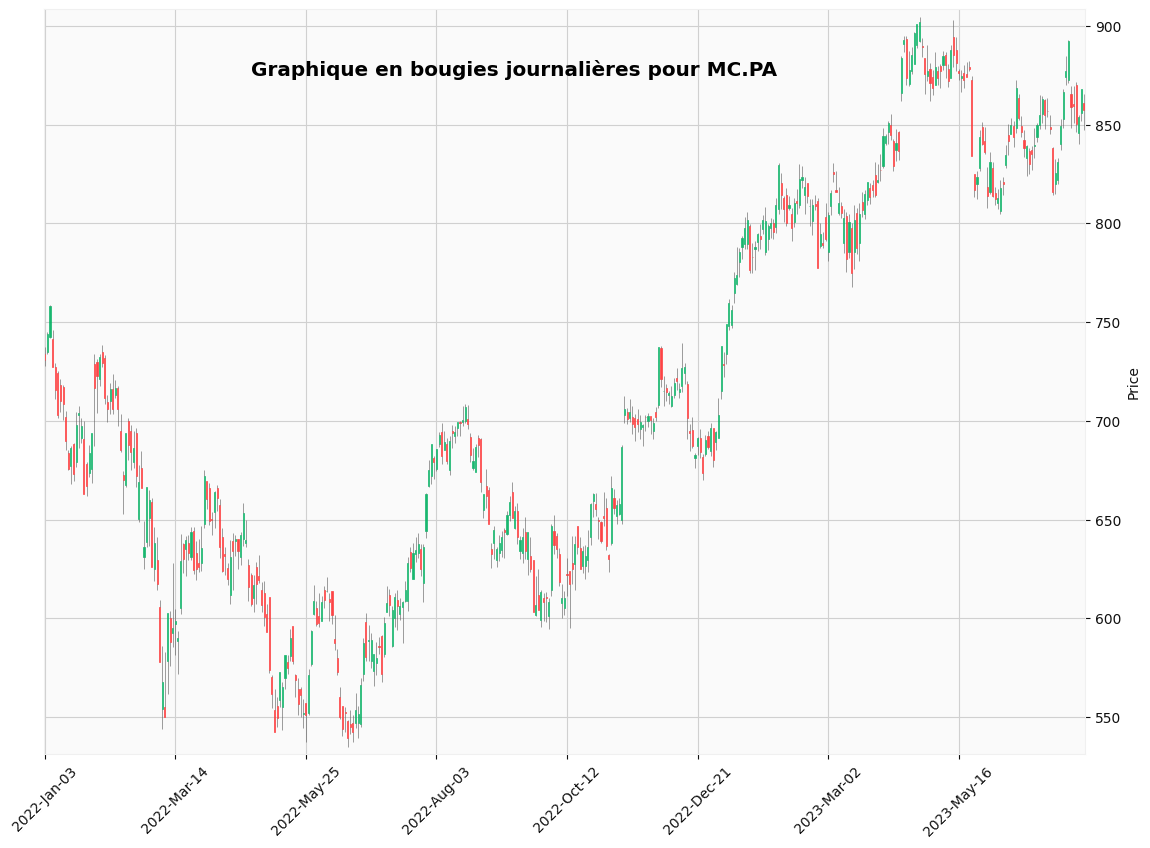

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf

# Télécharger les données d'une action réelle à partir de Yahoo Finance
ticker = 'MC.PA'
data = yf.download(ticker, start='2022-01-01', end='2023-07-25')

# Créer un graphique en bougies pour visualiser les prix d'ouverture, de clôture, les hauts et les bas (journalier)
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1) # -> ceci peut etre supprimé si vous faites des graphiques individuels. Cette ligne permet seulement d'oirganiser différents graphiques si vous souhaitez en affichez plusieurs
mpf.plot(data, type='candle', title=f'Graphique en bougies journalières pour {ticker}', style='yahoo', figscale=1.5, tight_layout=True)

# Convertir les données en bougies hebdomadaires
data_weekly = data.resample('W').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

plt.show()


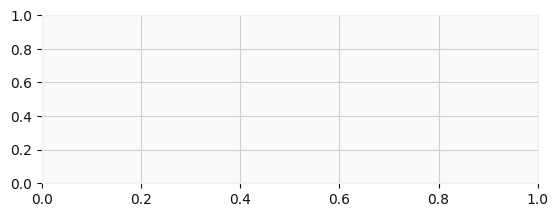

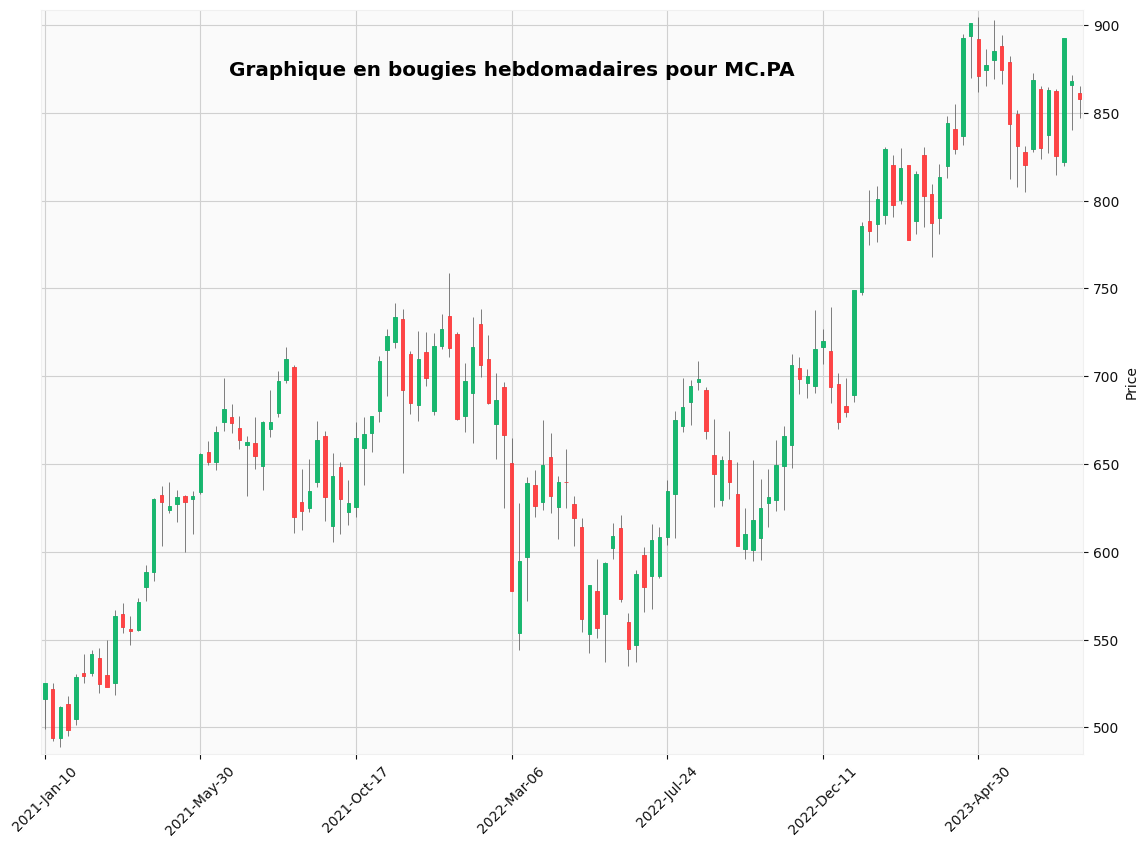

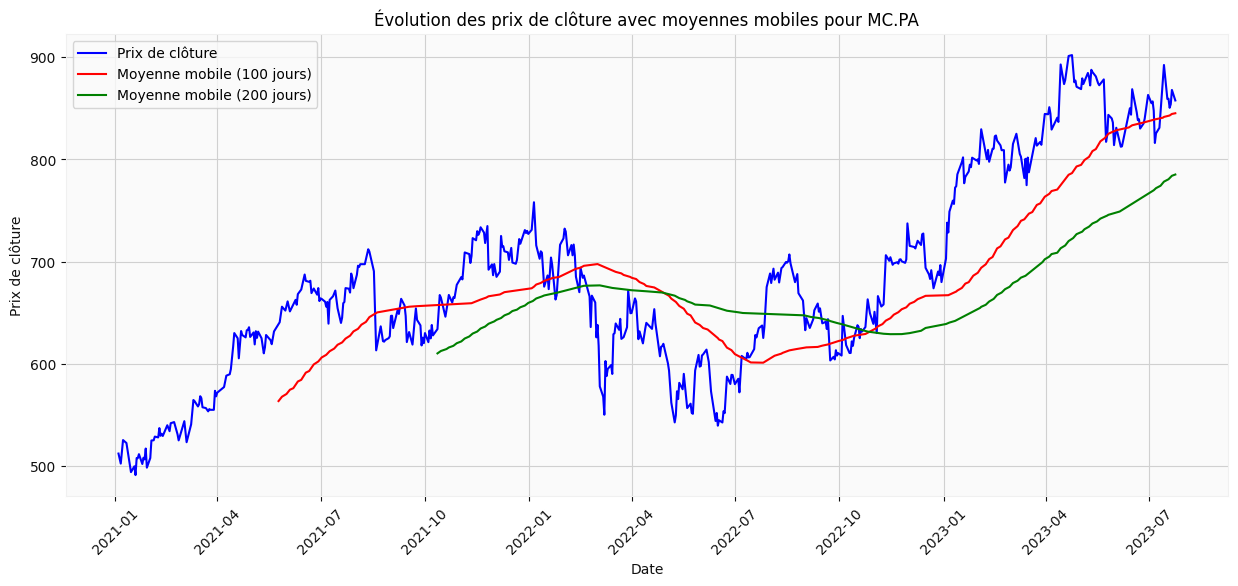

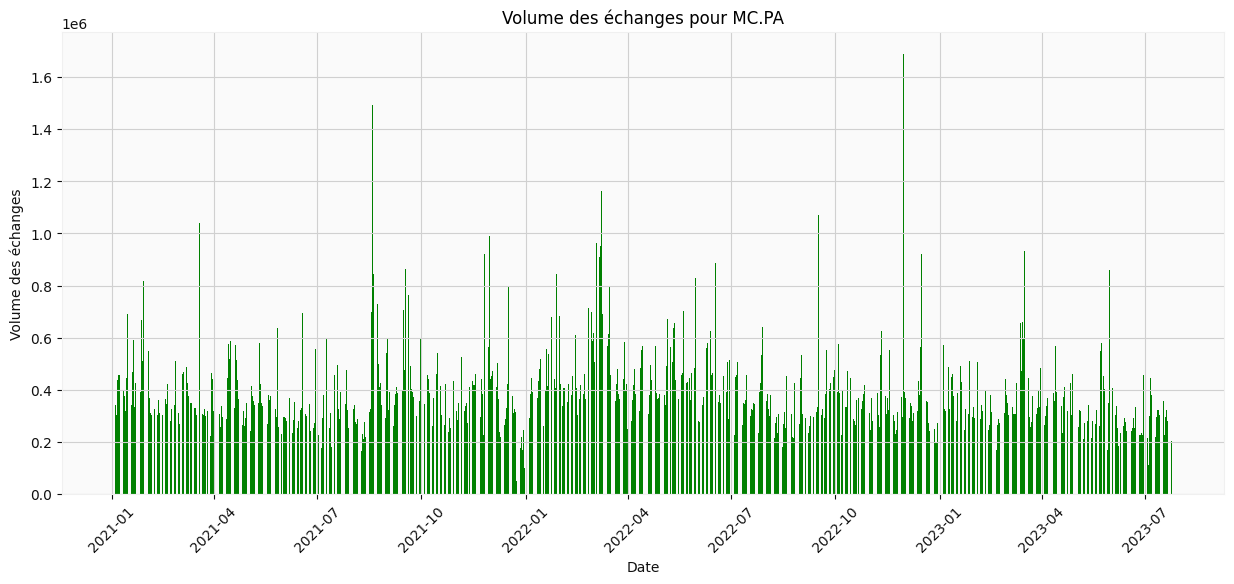

In [8]:
# Créer un graphique en bougies pour visualiser les prix d'ouverture, de clôture, les hauts et les bas (hebdomadaire)
plt.subplot(2, 1, 2) # -> ceci peut etre supprimé si vous faites des graphiques individuels. Cette ligne permet seulement d'oirganiser différents graphiques si vous souhaitez en affichez plusieurs
mpf.plot(data_weekly, type='candle', title=f'Graphique en bougies hebdomadaires pour {ticker}', style='yahoo', figscale=1.5, tight_layout=True)

# Créer un graphique de ligne avec les moyennes mobiles (100 jours, 200 jours) pour identifier la tendance
plt.figure(figsize=(15, 6))
data['MA100'] = data['Close'].rolling(window=100).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

plt.plot(data['Close'], label='Prix de clôture', color='blue')
plt.plot(data['MA100'], label='Moyenne mobile (100 jours)', color='red')
plt.plot(data['MA200'], label='Moyenne mobile (200 jours)', color='green')

plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.title(f'Évolution des prix de clôture avec moyennes mobiles pour {ticker}')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Créer un graphique en barres pour visualiser le volume des échanges
plt.figure(figsize=(15, 6))
plt.bar(data.index, data['Volume'], color='green')
plt.xlabel('Date')
plt.ylabel('Volume des échanges')
plt.title(f'Volume des échanges pour {ticker}')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()